# Experiement: First Round | 14%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/cardio_14.csv")

df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  55261  20464       1     156    88.0    130     80            3     1   
1  18559  20147       1     165    65.0    120     79            1     1   
2  44430  19600       1     167   111.0    130     80            1     1   
3  93138  16648       1     169    93.0    120     80            2     1   
4  36903  19559       2     166    51.0    140     90            1     1   

   smoke  alco  active  cardio  
0      0     0       1       1  
1      0     0       1       1  
2      0     0       1       1  
3      0     0       1       1  
4      0     0       1       1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40379 entries, 0 to 40378
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           40379 non-null  int64  
 1   age          40379 non-null  int64  
 2   gender       40379 non-null  int64  
 3   height       40379 non-null  int64  
 4   weight       40379 non-null  float64
 5   ap_hi        40379 non-null  int64  
 6   ap_lo        40379 non-null  int64  
 7   cholesterol  40379 non-null  int64  
 8   gluc         40379 non-null  int64  
 9   smoke        40379 non-null  int64  
 10  alco         40379 non-null  int64  
 11  active       40379 non-null  int64  
 12  cardio       40379 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 4.0 MB


In [3]:
pd.value_counts(df['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (14%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df['cardio'].value_counts()

0    34679
1     5700
Name: cardio, dtype: int64

Balance ratio: 5700/40379 = 0,141162

# Train/Test split

The random_state is 42.

In [4]:
# Importing the splitter, classification model, and the metric
from sklearn.model_selection import train_test_split
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cardio']), df['cardio'], test_size = 0.2, stratify = df['cardio'], random_state = 42)

In [5]:
X_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
20258  42353  22805       1     165    62.0    120     80            1     3   
1199   66184  20367       1     182    89.0    120     80            1     1   
31723  75042  14693       2     165    59.0    120     80            1     1   
577    61874  22718       1     151    58.0    170     10            3     1   
5800    1250  18018       2     160    85.0    120     60            1     1   

       smoke  alco  active  
20258      0     0       1  
1199       0     0       1  
31723      0     0       1  
577        0     0       1  
5800       0     0       1

# Logistic Regression with raw dataset

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     27743
           1       0.33      0.01      0.02      4560

    accuracy                           0.86     32303
   macro avg       0.60      0.50      0.47     32303
weighted avg       0.78      0.86      0.80     32303



In [7]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      6936
           1       0.26      0.01      0.02      1140

    accuracy                           0.86      8076
   macro avg       0.56      0.50      0.47      8076
weighted avg       0.78      0.86      0.79      8076



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.692


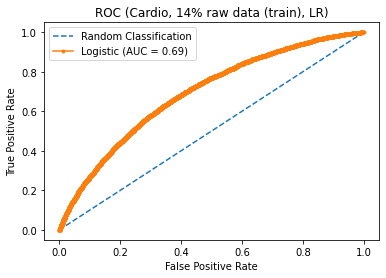

In [8]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 14% raw data (train), LR)')
# show the legend
pyplot.legend()
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.696


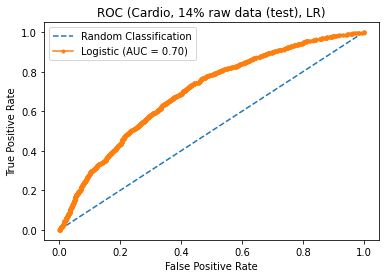

In [9]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 14% raw data (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with raw dataset

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     27743
           1       0.84      0.01      0.02      4560

    accuracy                           0.86     32303
   macro avg       0.85      0.51      0.47     32303
weighted avg       0.86      0.86      0.80     32303



In [11]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      6936
           1       0.62      0.00      0.01      1140

    accuracy                           0.86      8076
   macro avg       0.74      0.50      0.47      8076
weighted avg       0.83      0.86      0.79      8076



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.768


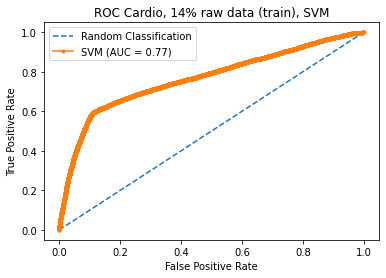

In [12]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 14% raw data (train), SVM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.671


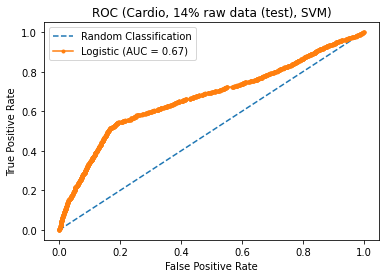

In [13]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 14% raw data (test), SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with raw dataset

In [14]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [15]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.13838	validation_0-logloss:0.63623	validation_1-error:0.14289	validation_1-logloss:0.63667
[1]	validation_0-error:0.13720	validation_0-logloss:0.58976	validation_1-error:0.14227	validation_1-logloss:0.59056
[2]	validation_0-error:0.13729	validation_0-logloss:0.55121	validation_1-error:0.14017	validation_1-logloss:0.55235
[3]	validation_0-error:0.13729	validation_0-logloss:0.51896	validation_1-error:0.14017	validation_1-logloss:0.52043
[4]	validation_0-error:0.13692	validation_0-logloss:0.49169	validation_1-error:0.14042	validation_1-logloss:0.49347
[5]	validation_0-error:0.13689	validation_0-logloss:0.46867	validation_1-error:0.14017	validation_1-logloss:0.47063
[6]	validation_0-error:0.13671	validation_0-logloss:0.44904	validation_1-error:0.14017	validation_1-logloss:0.45128
[7]	validation_0-error:0.13627	validation_0-logloss:0.43232	validation_1-error:0.14017	validation_1-logloss:0.43469
[8]	validation_0-error:0.13630	validation_0-logloss:0.41793	validation_1

[71]	validation_0-error:0.12946	validation_0-logloss:0.31874	validation_1-error:0.13980	validation_1-logloss:0.33093
CPU times: user 3.83 s, sys: 105 ms, total: 3.93 s
Wall time: 4.78 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     27743
           1       0.64      0.18      0.28      4560

    accuracy                           0.87     32303
   macro avg       0.76      0.58      0.60     32303
weighted avg       0.85      0.87      0.84     32303



In [17]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6936
           1       0.52      0.15      0.23      1140

    accuracy                           0.86      8076
   macro avg       0.70      0.56      0.58      8076
weighted avg       0.82      0.86      0.83      8076



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.817


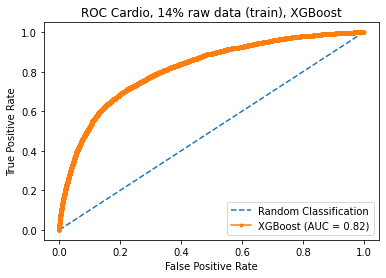

In [18]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 14% raw data (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.798


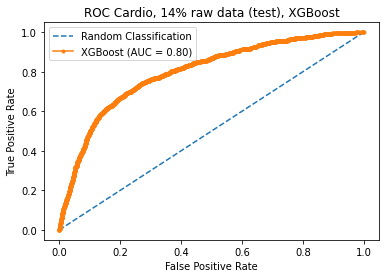

In [19]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 14% raw data (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Data augmentation

In the following part, the data gets perfectly balanced, by applying SMOTE, TVAE, and CTGAN to the raw dataset. The minority class is oversampled, by only creating samples with cardio=1. Afterwards, the machine learning algorithms run with the balaned datasets.

In [20]:
df_train = X_train
df_train['cardio'] = y_train

In [21]:
df_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
20258  42353  22805       1     165    62.0    120     80            1     3   
1199   66184  20367       1     182    89.0    120     80            1     1   
31723  75042  14693       2     165    59.0    120     80            1     1   
577    61874  22718       1     151    58.0    170     10            3     1   
5800    1250  18018       2     160    85.0    120     60            1     1   

       smoke  alco  active  cardio  
20258      0     0       1       0  
1199       0     0       1       1  
31723      0     0       1       0  
577        0     0       1       1  
5800       0     0       1       0


### SMOTE

1    27743
0    27743
Name: cardio, dtype: int64

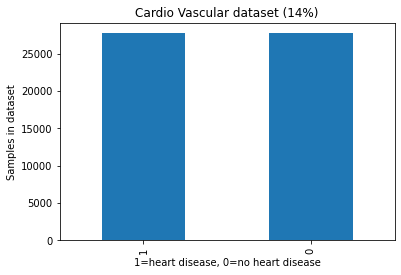

In [22]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_train[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']], df_train['cardio'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
df_oversampler_y = pd.DataFrame(y, columns = ['cardio'])
pd.value_counts(df_oversampler_y['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (14%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df_oversampler_y['cardio'].value_counts()

In [23]:
X_train = df_oversampler
y_train = df_oversampler_y

## Logistic Regression with data from SMOTE

In [24]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72     27743
           1       0.72      0.69      0.71     27743

    accuracy                           0.71     55486
   macro avg       0.71      0.71      0.71     55486
weighted avg       0.71      0.71      0.71     55486



In [25]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81      6936
           1       0.28      0.66      0.40      1140

    accuracy                           0.71      8076
   macro avg       0.61      0.69      0.60      8076
weighted avg       0.84      0.71      0.75      8076



In [26]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 14% SMOTE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.774


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.756


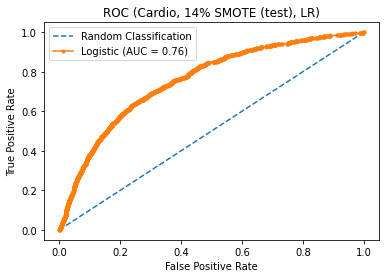

In [27]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 14% SMOTE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with data from SMOTE

In [28]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78     27743
           1       0.78      0.77      0.77     27743

    accuracy                           0.78     55486
   macro avg       0.78      0.78      0.78     55486
weighted avg       0.78      0.78      0.78     55486



In [29]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84      6936
           1       0.28      0.54      0.37      1140

    accuracy                           0.74      8076
   macro avg       0.60      0.66      0.60      8076
weighted avg       0.82      0.74      0.77      8076



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.848


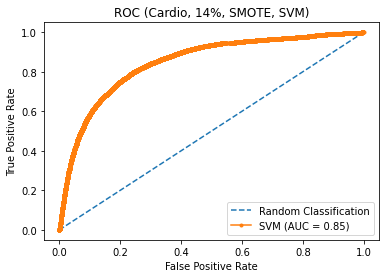

In [30]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 14%, SMOTE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.729


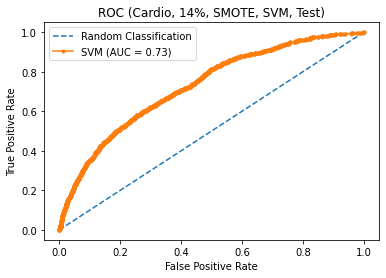

In [31]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 14%, SMOTE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## XGBoost with data from SMOTE

In [32]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.20288	validation_0-logloss:0.65540	validation_1-error:0.21706	validation_1-logloss:0.66000
[1]	validation_0-error:0.20243	validation_0-logloss:0.62449	validation_1-error:0.21731	validation_1-logloss:0.63275
[2]	validation_0-error:0.19677	validation_0-logloss:0.59419	validation_1-error:0.21248	validation_1-logloss:0.60671
[3]	validation_0-error:0.19753	validation_0-logloss:0.57062	validation_1-error:0.21298	validation_1-logloss:0.58605
[4]	validation_0-error:0.19673	validation_0-logloss:0.55132	validation_1-error:0.21360	validation_1-logloss:0.56960
[5]	validation_0-error:0.18922	validation_0-logloss:0.53012	validation_1-error:0.20394	validation_1-logloss:0.55225
[6]	validation_0-error:0.18877	validation_0-logloss:0.51470	validation_1-error:0.20852	validation_1-logloss:0.53919
[7]	validation_0-error:0.18515	validation_0-logloss:0.49994	validation_1-error:0.20381	validation_1-logloss:0.52784
[8]	validation_0-error:0.18565	validation_0-logloss:0.48748	validation_1

[71]	validation_0-error:0.14135	validation_0-logloss:0.33167	validation_1-error:0.17509	validation_1-logloss:0.41146
[72]	validation_0-error:0.14115	validation_0-logloss:0.33128	validation_1-error:0.17496	validation_1-logloss:0.41151
[73]	validation_0-error:0.14079	validation_0-logloss:0.33076	validation_1-error:0.17546	validation_1-logloss:0.41145
[74]	validation_0-error:0.14065	validation_0-logloss:0.33009	validation_1-error:0.17571	validation_1-logloss:0.41128
[75]	validation_0-error:0.14054	validation_0-logloss:0.32925	validation_1-error:0.17546	validation_1-logloss:0.41109
[76]	validation_0-error:0.14050	validation_0-logloss:0.32879	validation_1-error:0.17571	validation_1-logloss:0.41073
[77]	validation_0-error:0.14041	validation_0-logloss:0.32842	validation_1-error:0.17633	validation_1-logloss:0.41065
[78]	validation_0-error:0.14011	validation_0-logloss:0.32783	validation_1-error:0.17633	validation_1-logloss:0.41051
[79]	validation_0-error:0.13975	validation_0-logloss:0.32736	val

[141]	validation_0-error:0.12558	validation_0-logloss:0.29744	validation_1-error:0.17348	validation_1-logloss:0.39782
[142]	validation_0-error:0.12546	validation_0-logloss:0.29723	validation_1-error:0.17348	validation_1-logloss:0.39787
[143]	validation_0-error:0.12477	validation_0-logloss:0.29579	validation_1-error:0.17249	validation_1-logloss:0.39691
[144]	validation_0-error:0.12450	validation_0-logloss:0.29536	validation_1-error:0.17273	validation_1-logloss:0.39679
[145]	validation_0-error:0.12446	validation_0-logloss:0.29528	validation_1-error:0.17261	validation_1-logloss:0.39672
[146]	validation_0-error:0.12419	validation_0-logloss:0.29480	validation_1-error:0.17211	validation_1-logloss:0.39662
[147]	validation_0-error:0.12417	validation_0-logloss:0.29470	validation_1-error:0.17224	validation_1-logloss:0.39663
[148]	validation_0-error:0.12399	validation_0-logloss:0.29430	validation_1-error:0.17137	validation_1-logloss:0.39650
[149]	validation_0-error:0.12342	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     27743
           1       0.92      0.86      0.89     27743

    accuracy                           0.89     55486
   macro avg       0.89      0.89      0.89     55486
weighted avg       0.89      0.89      0.89     55486



In [34]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      6936
           1       0.40      0.35      0.37      1140

    accuracy                           0.83      8076
   macro avg       0.65      0.63      0.64      8076
weighted avg       0.82      0.83      0.83      8076



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.955


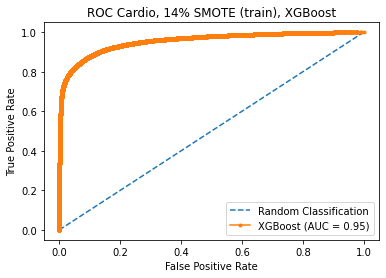

In [35]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 14% SMOTE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.771


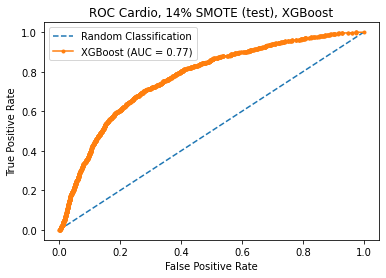

In [36]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 14% SMOTE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Data augmentation with TVAE 

In [37]:
df_train['cardio'].value_counts()

0    27743
1     4560
Name: cardio, dtype: int64

In [38]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(df_train)
# Once trained generate samples
samples = tvae.sample(5000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([df_train,samples])
tvae_result_df['cardio'].value_counts()

0    27743
1     4578
Name: cardio, dtype: int64

In [39]:
tvae = TVAE()

tvae.fit(tvae_result_df)
# Once trained generate samples
samples = tvae.sample(7000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df1 = pd.concat([tvae_result_df,samples])
tvae_result_df1['cardio'].value_counts()

0    27743
1     5661
Name: cardio, dtype: int64

In [40]:
tvae = TVAE()

tvae.fit(tvae_result_df1)
# Once trained generate samples
samples = tvae.sample(6000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df2 = pd.concat([tvae_result_df1,samples])
tvae_result_df2['cardio'].value_counts()

0    27743
1     7539
Name: cardio, dtype: int64

In [41]:
tvae = TVAE()

tvae.fit(tvae_result_df2)
# Once trained generate samples
samples = tvae.sample(7500)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df3 = pd.concat([tvae_result_df2,samples])
tvae_result_df3['cardio'].value_counts()

0    27743
1     9073
Name: cardio, dtype: int64

In [42]:
tvae = TVAE()

tvae.fit(tvae_result_df3)
# Once trained generate samples
samples = tvae.sample(10000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df4 = pd.concat([tvae_result_df3,samples])
tvae_result_df4['cardio'].value_counts()

0    27743
1    12186
Name: cardio, dtype: int64

In [43]:
tvae = TVAE()

tvae.fit(tvae_result_df4)
# Once trained generate samples
samples = tvae.sample(12000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df5 = pd.concat([tvae_result_df4,samples])
tvae_result_df5['cardio'].value_counts()

0    27743
1    16767
Name: cardio, dtype: int64

In [44]:
tvae = TVAE()

tvae.fit(tvae_result_df5)
# Once trained generate samples
samples = tvae.sample(14000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df6 = pd.concat([tvae_result_df5,samples])
tvae_result_df6['cardio'].value_counts()

0    27743
1    20453
Name: cardio, dtype: int64

In [45]:
tvae = TVAE()

tvae.fit(tvae_result_df6)
# Once trained generate samples
samples = tvae.sample(17000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df7 = pd.concat([tvae_result_df6,samples])
tvae_result_df7['cardio'].value_counts()

0    27743
1    27567
Name: cardio, dtype: int64

In [46]:
tvae = TVAE()

tvae.fit(tvae_result_df7)
# Once trained generate samples
samples = tvae.sample(20000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df8 = pd.concat([tvae_result_df7,samples])
tvae_result_df8['cardio'].value_counts()

1    35473
0    27743
Name: cardio, dtype: int64

In [47]:
tvae_result_df_1 = tvae_result_df8[tvae_result_df8['cardio'] == 1]
tvae_result_df_1['cardio'].value_counts()

1    35473
Name: cardio, dtype: int64

In [48]:
tvae_result_df_0 = tvae_result_df8[tvae_result_df8['cardio'] == 0]
tvae_result_df_0['cardio'].value_counts()

0    27743
Name: cardio, dtype: int64

In [49]:
train_df_1_bal = tvae_result_df_1.sample(n = 27743)

In [50]:
train_df_balanced = train_df_1_bal.append(tvae_result_df_0)

1    27743
0    27743
Name: cardio, dtype: int64

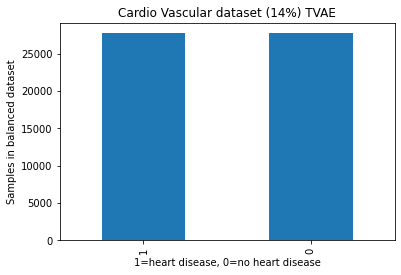

In [51]:
pd.value_counts(train_df_balanced['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (14%) TVAE')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in balanced dataset')
train_df_balanced['cardio'].value_counts()

In [52]:
X_train = train_df_balanced.drop(['cardio'], axis=1)
y_train = train_df_balanced['cardio']

### Logistic Regression with TVAE balanced data

In [53]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69     27743
           1       0.68      0.71      0.70     27743

    accuracy                           0.69     55486
   macro avg       0.69      0.69      0.69     55486
weighted avg       0.69      0.69      0.69     55486



In [54]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.66      0.75      6936
           1       0.18      0.47      0.26      1140

    accuracy                           0.63      8076
   macro avg       0.53      0.56      0.51      8076
weighted avg       0.78      0.63      0.68      8076



In [55]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 14% TVAE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.765


In [56]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 14% TVAE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.595


## SVM with TVAE balanced data

In [57]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     27743
           1       0.98      0.82      0.89     27743

    accuracy                           0.90     55486
   macro avg       0.91      0.90      0.90     55486
weighted avg       0.91      0.90      0.90     55486



In [58]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6936
           1       0.28      0.04      0.07      1140

    accuracy                           0.85      8076
   macro avg       0.57      0.51      0.49      8076
weighted avg       0.78      0.85      0.80      8076



In [59]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 14%, TVAE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.955


No Skill: ROC AUC=0.500
SVM: ROC AUC=0.671


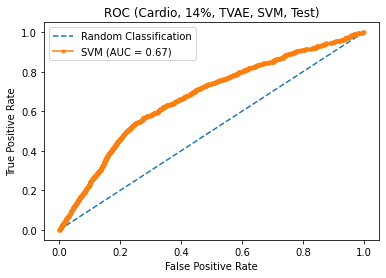

In [60]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 14%, TVAE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with TVAE balanced data

In [61]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.12062	validation_0-logloss:0.63132	validation_1-error:0.14116	validation_1-logloss:0.64536
[1]	validation_0-error:0.12062	validation_0-logloss:0.58089	validation_1-error:0.14116	validation_1-logloss:0.60592
[2]	validation_0-error:0.12062	validation_0-logloss:0.53902	validation_1-error:0.14116	validation_1-logloss:0.57305
[3]	validation_0-error:0.12062	validation_0-logloss:0.50386	validation_1-error:0.14116	validation_1-logloss:0.54519
[4]	validation_0-error:0.12062	validation_0-logloss:0.47413	validation_1-error:0.14116	validation_1-logloss:0.52170
[5]	validation_0-error:0.12062	validation_0-logloss:0.44887	validation_1-error:0.14116	validation_1-logloss:0.50166
[6]	validation_0-error:0.12062	validation_0-logloss:0.42690	validation_1-error:0.14116	validation_1-logloss:0.48578
[7]	validation_0-error:0.12062	validation_0-logloss:0.40807	validation_1-error:0.14116	validation_1-logloss:0.47071
[8]	validation_0-error:0.12062	validation_0-logloss:0.39158	validation_1

[71]	validation_0-error:0.07793	validation_0-logloss:0.19501	validation_1-error:0.14772	validation_1-logloss:0.34719
[72]	validation_0-error:0.07784	validation_0-logloss:0.19457	validation_1-error:0.14735	validation_1-logloss:0.34706
[73]	validation_0-error:0.07777	validation_0-logloss:0.19423	validation_1-error:0.14723	validation_1-logloss:0.34673
[74]	validation_0-error:0.07770	validation_0-logloss:0.19402	validation_1-error:0.14698	validation_1-logloss:0.34667
[75]	validation_0-error:0.07760	validation_0-logloss:0.19382	validation_1-error:0.14710	validation_1-logloss:0.34669
[76]	validation_0-error:0.07748	validation_0-logloss:0.19341	validation_1-error:0.14698	validation_1-logloss:0.34669
[77]	validation_0-error:0.07716	validation_0-logloss:0.19300	validation_1-error:0.14735	validation_1-logloss:0.34657
[78]	validation_0-error:0.07687	validation_0-logloss:0.19274	validation_1-error:0.14723	validation_1-logloss:0.34639
[79]	validation_0-error:0.07687	validation_0-logloss:0.19263	val

[141]	validation_0-error:0.07023	validation_0-logloss:0.17960	validation_1-error:0.14859	validation_1-logloss:0.34473
CPU times: user 13.6 s, sys: 331 ms, total: 13.9 s
Wall time: 6.65 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93     27743
           1       0.98      0.87      0.93     27743

    accuracy                           0.93     55486
   macro avg       0.94      0.93      0.93     55486
weighted avg       0.94      0.93      0.93     55486



In [63]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6936
           1       0.36      0.07      0.12      1140

    accuracy                           0.85      8076
   macro avg       0.61      0.53      0.52      8076
weighted avg       0.79      0.85      0.81      8076



In [64]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 14% TVAE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.973


No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.779


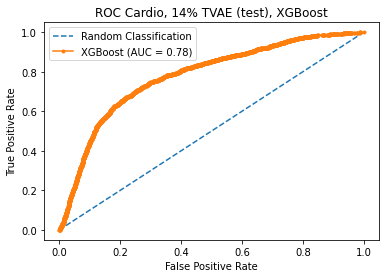

In [65]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 14% TVAE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## CTGAN for balancing the dataset

In [66]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

ctgan.fit(df_train, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(3000)
samples = samples[samples['cardio'] ==1.0]
samples['cardio'].value_counts()

1    633
Name: cardio, dtype: int64

In [70]:
ctgan_1 = df_train[df_train['cardio'] == 1]
ctgan_0 = df_train[df_train['cardio'] == 0]
ctgan_0_sm = ctgan_0.sample(n = 9000)
df_train_sm = samples.append(ctgan_0_sm)
df_train_sm = df_train_sm.append(ctgan_1)
df_train_sm['cardio'].value_counts()

0    9000
1    5193
Name: cardio, dtype: int64

In [71]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples1 = ctgan.sample(5500)
samples1 = samples1[samples1['cardio'] ==1.0]
samples1['cardio'].value_counts()

1    2373
Name: cardio, dtype: int64

In [72]:
df_train_sm1 = df_train_sm.append(samples1)

ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples2 = ctgan.sample(7000)
samples2 = samples2[samples2['cardio'] ==1.0]
samples2['cardio'].value_counts()

1    2442
Name: cardio, dtype: int64

In [73]:
df_train_sm2 = df_train_sm1.append(samples2)

ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm2, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples3 = ctgan.sample(9000)
samples3 = samples3[samples3['cardio'] ==1.0]
samples3['cardio'].value_counts()

1    4715
Name: cardio, dtype: int64

In [74]:
df_train_sm3 = df_train_sm1.append(samples3)
df_train_sm3['cardio'].value_counts()

1    12281
0     9000
Name: cardio, dtype: int64

In [75]:
ctgan_0_med = ctgan_0.sample(n = 17000)
ctgan_1_1 = df_train_sm3[df_train_sm3['cardio'] == 1]
df_train_med = ctgan_1_1.append(ctgan_0_med)
df_train_med['cardio'].value_counts()

0    17000
1    12281
Name: cardio, dtype: int64

In [76]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_med, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples4 = ctgan.sample(13000)
samples4 = samples3[samples3['cardio'] ==1.0]
samples4['cardio'].value_counts()

1    4715
Name: cardio, dtype: int64

In [77]:
df_train_med1 = df_train_med.append(samples4)

ctgan = CTGANSynthesizer()

ctgan.fit(df_train_med1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples5 = ctgan.sample(15000)
samples5 = samples5[samples5['cardio'] ==1.0]
samples5['cardio'].value_counts()

1    8384
Name: cardio, dtype: int64

In [78]:
df_train_med2 = df_train_med1.append(samples5)
df_train_med2['cardio'].value_counts()

1    25380
0    17000
Name: cardio, dtype: int64

In [79]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_med2, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples6 = ctgan.sample(7000)
samples6 = samples6[samples6['cardio'] ==1.0]
samples6['cardio'].value_counts()

1    4260
Name: cardio, dtype: int64

In [81]:
df_train_all_1 = df_train_med2.append(samples6)
ctgan_1 = df_train_all_1[df_train_all_1['cardio'] == 1]
train_df_1_bal = ctgan_1.sample(n = 27743)
df_train_bal = ctgan_0.append(train_df_1_bal)
df_train_bal['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [82]:
X_train = df_train_bal.drop(['cardio'], axis=1)
y_train = df_train_bal['cardio']

### Logistic Regression with CTGAN data

In [83]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.69      0.76      0.73     27743
           1       0.74      0.66      0.69     27743

    accuracy                           0.71     55486
   macro avg       0.71      0.71      0.71     55486
weighted avg       0.71      0.71      0.71     55486



In [84]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      6936
           1       0.24      0.47      0.32      1140

    accuracy                           0.72      8076
   macro avg       0.57      0.61      0.57      8076
weighted avg       0.80      0.72      0.75      8076



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.777


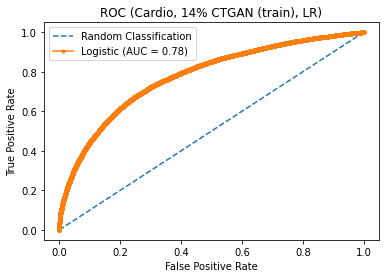

In [85]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 14% CTGAN (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.663


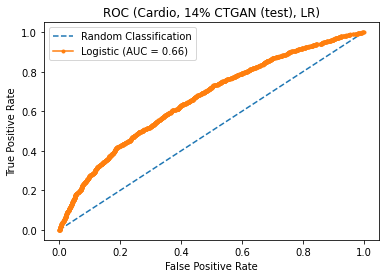

In [86]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 14% CTGAN (test), LR)')
# show the legend
pyplot.legend()
# show the plot

### SVM with CTGAN data

In [87]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76     27743
           1       0.77      0.72      0.74     27743

    accuracy                           0.75     55486
   macro avg       0.76      0.75      0.75     55486
weighted avg       0.76      0.75      0.75     55486



In [88]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      6936
           1       0.27      0.49      0.35      1140

    accuracy                           0.74      8076
   macro avg       0.59      0.64      0.59      8076
weighted avg       0.81      0.74      0.77      8076



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.832


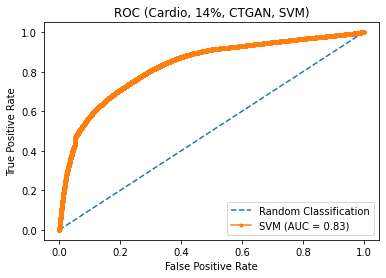

In [89]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 14%, CTGAN, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.723


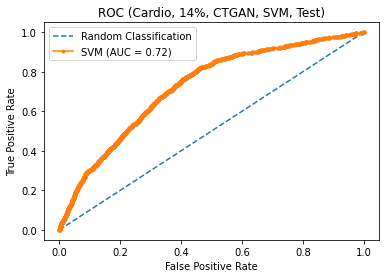

In [90]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 14%, CTGAN, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### XGBoost with CTGAN data

In [91]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.16853	validation_0-logloss:0.64395	validation_1-error:0.18091	validation_1-logloss:0.65188
[1]	validation_0-error:0.16853	validation_0-logloss:0.60313	validation_1-error:0.18091	validation_1-logloss:0.61812
[2]	validation_0-error:0.16853	validation_0-logloss:0.56985	validation_1-error:0.18091	validation_1-logloss:0.59039
[3]	validation_0-error:0.16853	validation_0-logloss:0.54203	validation_1-error:0.18091	validation_1-logloss:0.56765
[4]	validation_0-error:0.16741	validation_0-logloss:0.51821	validation_1-error:0.18115	validation_1-logloss:0.54845
[5]	validation_0-error:0.15334	validation_0-logloss:0.50330	validation_1-error:0.18995	validation_1-logloss:0.53632
[6]	validation_0-error:0.15307	validation_0-logloss:0.48532	validation_1-error:0.18970	validation_1-logloss:0.52243
[7]	validation_0-error:0.14897	validation_0-logloss:0.47408	validation_1-error:0.19131	validation_1-logloss:0.51343
[8]	validation_0-error:0.14959	validation_0-logloss:0.45949	validation_1

[71]	validation_0-error:0.10448	validation_0-logloss:0.26741	validation_1-error:0.16679	validation_1-logloss:0.38253
[72]	validation_0-error:0.10435	validation_0-logloss:0.26699	validation_1-error:0.16704	validation_1-logloss:0.38237
[73]	validation_0-error:0.10399	validation_0-logloss:0.26614	validation_1-error:0.16654	validation_1-logloss:0.38206
[74]	validation_0-error:0.10374	validation_0-logloss:0.26542	validation_1-error:0.16629	validation_1-logloss:0.38168
[75]	validation_0-error:0.10340	validation_0-logloss:0.26438	validation_1-error:0.16543	validation_1-logloss:0.38125
[76]	validation_0-error:0.10343	validation_0-logloss:0.26398	validation_1-error:0.16605	validation_1-logloss:0.38114
[77]	validation_0-error:0.10271	validation_0-logloss:0.26304	validation_1-error:0.16568	validation_1-logloss:0.38101
[78]	validation_0-error:0.10255	validation_0-logloss:0.26204	validation_1-error:0.16568	validation_1-logloss:0.38067
[79]	validation_0-error:0.10240	validation_0-logloss:0.26119	val

[141]	validation_0-error:0.09543	validation_0-logloss:0.23970	validation_1-error:0.16320	validation_1-logloss:0.37585
[142]	validation_0-error:0.09547	validation_0-logloss:0.23957	validation_1-error:0.16332	validation_1-logloss:0.37596
[143]	validation_0-error:0.09538	validation_0-logloss:0.23919	validation_1-error:0.16382	validation_1-logloss:0.37584
[144]	validation_0-error:0.09534	validation_0-logloss:0.23913	validation_1-error:0.16444	validation_1-logloss:0.37586
[145]	validation_0-error:0.09528	validation_0-logloss:0.23903	validation_1-error:0.16444	validation_1-logloss:0.37578
[146]	validation_0-error:0.09521	validation_0-logloss:0.23896	validation_1-error:0.16370	validation_1-logloss:0.37584
[147]	validation_0-error:0.09500	validation_0-logloss:0.23875	validation_1-error:0.16370	validation_1-logloss:0.37582
[148]	validation_0-error:0.09498	validation_0-logloss:0.23858	validation_1-error:0.16444	validation_1-logloss:0.37583
[149]	validation_0-error:0.09478	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     27743
           1       0.93      0.87      0.90     27743

    accuracy                           0.90     55486
   macro avg       0.91      0.90      0.90     55486
weighted avg       0.91      0.90      0.90     55486



In [93]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6936
           1       0.39      0.28      0.32      1140

    accuracy                           0.84      8076
   macro avg       0.64      0.60      0.62      8076
weighted avg       0.82      0.84      0.82      8076



In [94]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 14% CTGAN (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.961


In [95]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 14% CTGAN (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.772
